In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
House = pd.read_csv("Housing_dataset_train.csv")

In [3]:
house = House.copy()

In [4]:
house.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [5]:
house.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [6]:
house.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [7]:
house.shape

(14000, 7)

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [9]:
house.drop('ID', axis=1, inplace=True)

<Axes: >

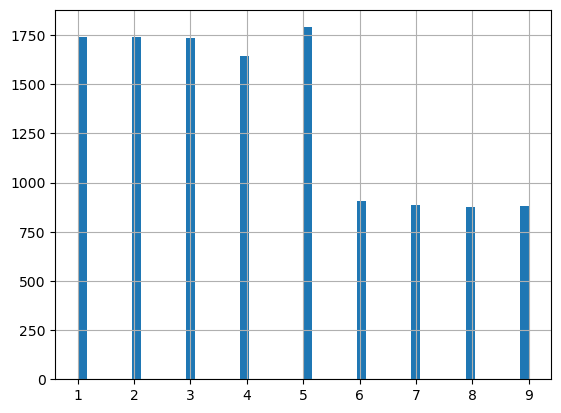

In [10]:
house.bedroom.hist(bins=50)

<Axes: >

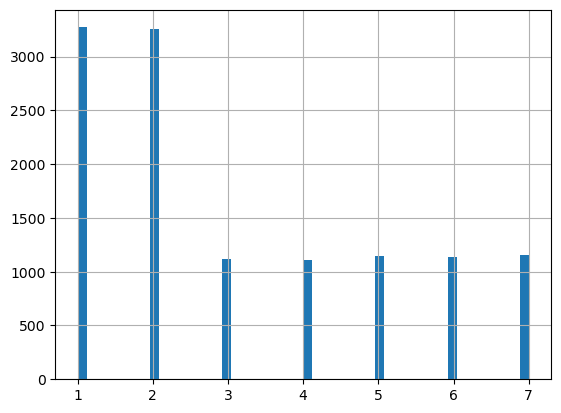

In [11]:
house.bathroom.hist(bins=50)

<Axes: ylabel='Frequency'>

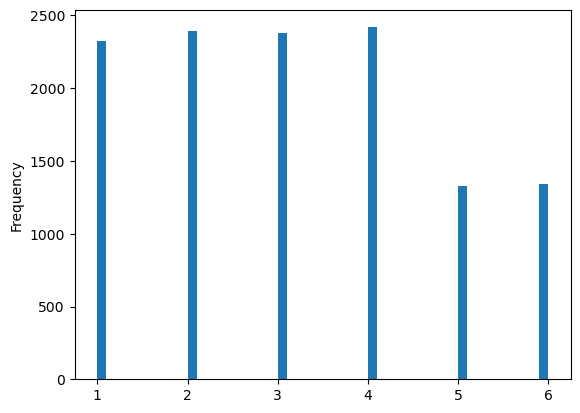

In [12]:
house.parking_space.plot(kind='hist',bins=50)

In [13]:
house.bedroom.unique()

array([ 2., nan,  7.,  5.,  3.,  1.,  4.,  6.,  9.,  8.])

In [14]:
house.bathroom.unique()

array([ 2.,  5.,  1.,  4.,  3., nan,  7.,  6.])

In [15]:
house.parking_space.unique()

array([ 1.,  4., nan,  6.,  3.,  5.,  2.])

<Axes: >

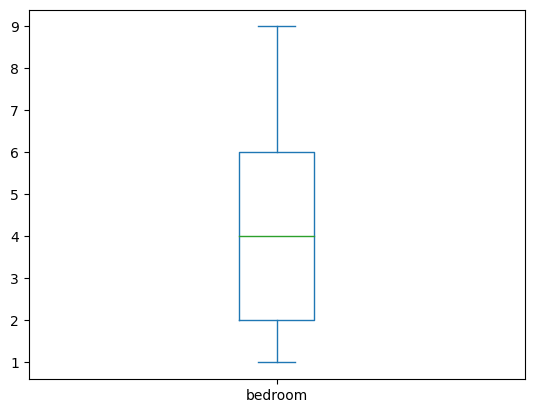

In [16]:
house.bedroom.plot(kind='box')

<Axes: >

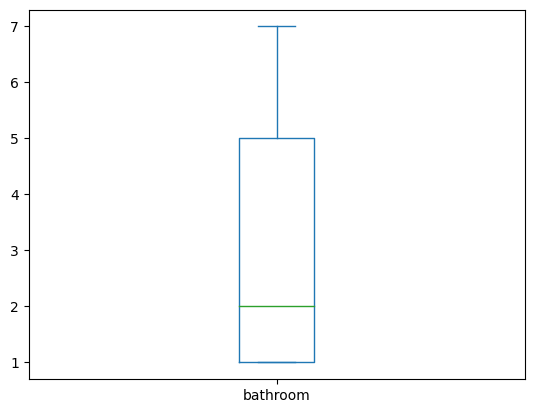

In [17]:
house.bathroom.plot(kind='box')

<Axes: >

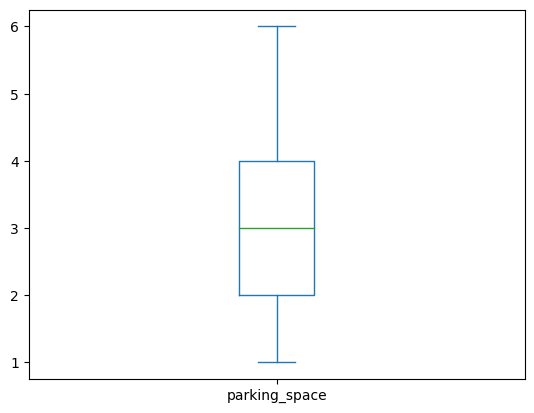

In [18]:
house.parking_space.plot(kind='box')

In [19]:
median_values = House[['bedroom', 'bathroom', 'parking_space']].median()

In [20]:
mean_values = House[['bedroom', 'bathroom', 'parking_space']].mean()

In [21]:
mode_values = House[['bedroom', 'bathroom', 'parking_space']].mode()

In [22]:
mode_values

,bedroom,bathroom,parking_space
0,5.0,1.0,4.0


In [23]:
median_values

bedroom          4.0
bathroom         2.0
parking_space    3.0
dtype: float64

# Splitting into X-feature and y-target

# Method 1

In [24]:
X = house[['bedroom','bathroom','parking_space']].fillna(median_values)
y = house.price

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.18, random_state=2)

In [26]:
X.isnull().sum()

bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [27]:
model = DecisionTreeRegressor()

In [28]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test,y_pred)
mse

879660054511.1561

# ANOTHER MODEL 2

In [31]:
Xn = house[['bedroom','bathroom','parking_space']].fillna(median_values)
yn = house.price

In [32]:
Xn_train,Xn_test, yn_train,yn_test = train_test_split(Xn, yn, train_size=.80, random_state=2, shuffle=True,)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.score(X_test, y_test)

0.2606029150856415

In [38]:
ylr_pred = lr.predict(X_test)

In [39]:
ylr_pred

array([2660915.92248442, 2048500.60479311, 1716972.238509  , ...,
       1842175.80354593, 1510007.42484072, 1514727.40641468])

# Another Model 3

In [40]:
nX = house[['bedroom','bathroom','parking_space']].fillna(1)
ny = house.price

In [41]:
nX_train,nX_test,ny_train,ny_test = train_test_split(nX,ny, test_size=.18, random_state=2)

In [42]:
model = DecisionTreeRegressor()

In [43]:
model.fit(nX_train,ny_train)

DecisionTreeRegressor()

In [44]:
y_pred = model.predict(nX_test)

In [45]:
mse = mean_squared_error(ny_test,y_pred)
mse

915257761731.1656

# Another Model 4

In [46]:
NnX = house[['bedroom','bathroom','parking_space']].fillna(mode_values)
Nny = house.price

In [47]:
NnX_train,NnX_test,Nny_train,Nny_test = train_test_split(NnX,Nny, test_size=.20, random_state=2)

In [48]:
model = DecisionTreeRegressor()

In [49]:
model.fit(NnX_train,Nny_train)

DecisionTreeRegressor()

In [50]:
y_pred = model.predict(NnX_test)

In [51]:
mse = mean_squared_error(Nny_test,y_pred)
mse

952943756442.3075

In [52]:
879660054511.1561-933082267261.3528

-53422212750.196655

In [53]:
933082267261.3528-879660054511.1561

53422212750.196655